In [30]:
import numpy as np 
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('bmh')

#df0 = pd.read_csv('train.csv',sep=',')
#df0['Type of Travel'].value_counts(normalize=True)
#df1 = pd.read_csv('test.csv',sep=',')

In [16]:
#df = df0.sample(n=6000)
#df.to_csv('DataFrame')

In [9]:
df = pd.read_csv('DataFrame', sep=',')

In [10]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,5984.000000
mean,51571.254000,51571.254000,65501.099667,39.101000,1197.438167,2.703667,3.065167,2.737833,2.968333,3.188000,...,3.448167,3.356833,3.374500,3.370167,3.631833,3.305833,3.638667,3.284500,14.808667,15.159425
std,29957.499029,29957.499029,37130.679422,15.172931,993.931490,1.346039,1.518762,1.402651,1.272635,1.343487,...,1.330767,1.339578,1.294937,1.312160,1.181744,1.260779,1.172035,1.323197,37.784927,38.387622
min,22.000000,22.000000,9.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,26030.250000,26030.250000,33786.250000,27.000000,425.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,50998.500000,50998.500000,65686.000000,40.000000,861.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77354.750000,77354.750000,97345.000000,50.000000,1732.250000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,14.000000
max,103881.000000,103881.000000,129863.000000,85.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,595.000000,589.000000


In [11]:
# Check for missing data
df.isna().sum()

Unnamed: 0                            0
Unnamed: 0.1                          0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             16


In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,28277,28277,54732,Female,Loyal Customer,69,Personal Travel,Eco,964,3,...,5,5,3,5,1,5,3,0,0.0,neutral or dissatisfied
1,78830,78830,90725,Male,Loyal Customer,55,Business travel,Business,240,2,...,1,1,2,3,2,3,2,163,153.0,neutral or dissatisfied
2,27414,27414,24654,Female,Loyal Customer,51,Business travel,Business,2672,5,...,4,4,4,4,5,4,3,0,0.0,satisfied
3,72198,72198,31150,Male,disloyal Customer,27,Business travel,Eco,495,2,...,3,4,4,3,4,2,3,0,0.0,neutral or dissatisfied
4,191,191,2980,Male,Loyal Customer,12,Personal Travel,Eco,462,2,...,2,3,4,2,2,1,2,0,0.0,neutral or dissatisfied


In [13]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','id'],inplace=True)

In [14]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,69,Personal Travel,Eco,964,3,2,3,3,...,5,5,3,5,1,5,3,0,0.0,neutral or dissatisfied
1,Male,Loyal Customer,55,Business travel,Business,240,2,5,5,5,...,1,1,2,3,2,3,2,163,153.0,neutral or dissatisfied
2,Female,Loyal Customer,51,Business travel,Business,2672,5,5,5,5,...,4,4,4,4,5,4,3,0,0.0,satisfied
3,Male,disloyal Customer,27,Business travel,Eco,495,2,3,2,2,...,3,4,4,3,4,2,3,0,0.0,neutral or dissatisfied
4,Male,Loyal Customer,12,Personal Travel,Eco,462,2,4,2,3,...,2,3,4,2,2,1,2,0,0.0,neutral or dissatisfied


In [15]:
X = df.copy(deep=True)

In [16]:
X.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [17]:
X.Gender = X.Gender.apply(lambda x: 0 if x == 'Male' else 1)
X['Customer Type'] = X['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
X['Type of Travel'] = X['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
X['Class'] = X['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
X['satisfaction'] = X['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)

In [18]:
X.reset_index(drop=True,inplace=True)
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,69,0,0,964,3,2,3,3,...,5,5,3,5,1,5,3,0,0.0,0
1,0,0,55,1,2,240,2,5,5,5,...,1,1,2,3,2,3,2,163,153.0,0
2,1,0,51,1,2,2672,5,5,5,5,...,4,4,4,4,5,4,3,0,0.0,1
3,0,1,27,1,0,495,2,3,2,2,...,3,4,4,3,4,2,3,0,0.0,0
4,0,0,12,0,0,462,2,4,2,3,...,2,3,4,2,2,1,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,49,0,0,1587,3,4,3,4,...,4,4,3,5,3,4,5,35,12.0,0
5996,1,0,33,0,0,588,2,5,2,3,...,5,5,3,5,5,5,5,0,0.0,0
5997,0,0,50,0,0,2358,1,4,1,5,...,4,4,5,4,4,3,4,0,0.0,0
5998,0,0,35,0,0,672,2,3,2,2,...,5,1,1,4,4,1,5,0,0.0,0


In [19]:
X.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,5984.000000,6000.000000
mean,0.507667,0.180000,39.101000,0.689167,1.020833,1197.438167,2.703667,3.065167,2.737833,2.968333,...,3.356833,3.374500,3.370167,3.631833,3.305833,3.638667,3.284500,14.808667,15.159425,0.429500
std,0.499983,0.384219,15.172931,0.462873,0.962230,993.931490,1.346039,1.518762,1.402651,1.272635,...,1.339578,1.294937,1.312160,1.181744,1.260779,1.172035,1.323197,37.784927,38.387622,0.495046
min,0.000000,0.000000,7.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,425.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,40.000000,1.000000,1.000000,861.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,50.000000,1.000000,2.000000,1732.250000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,14.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,595.000000,589.000000,1.000000


<AxesSubplot:>

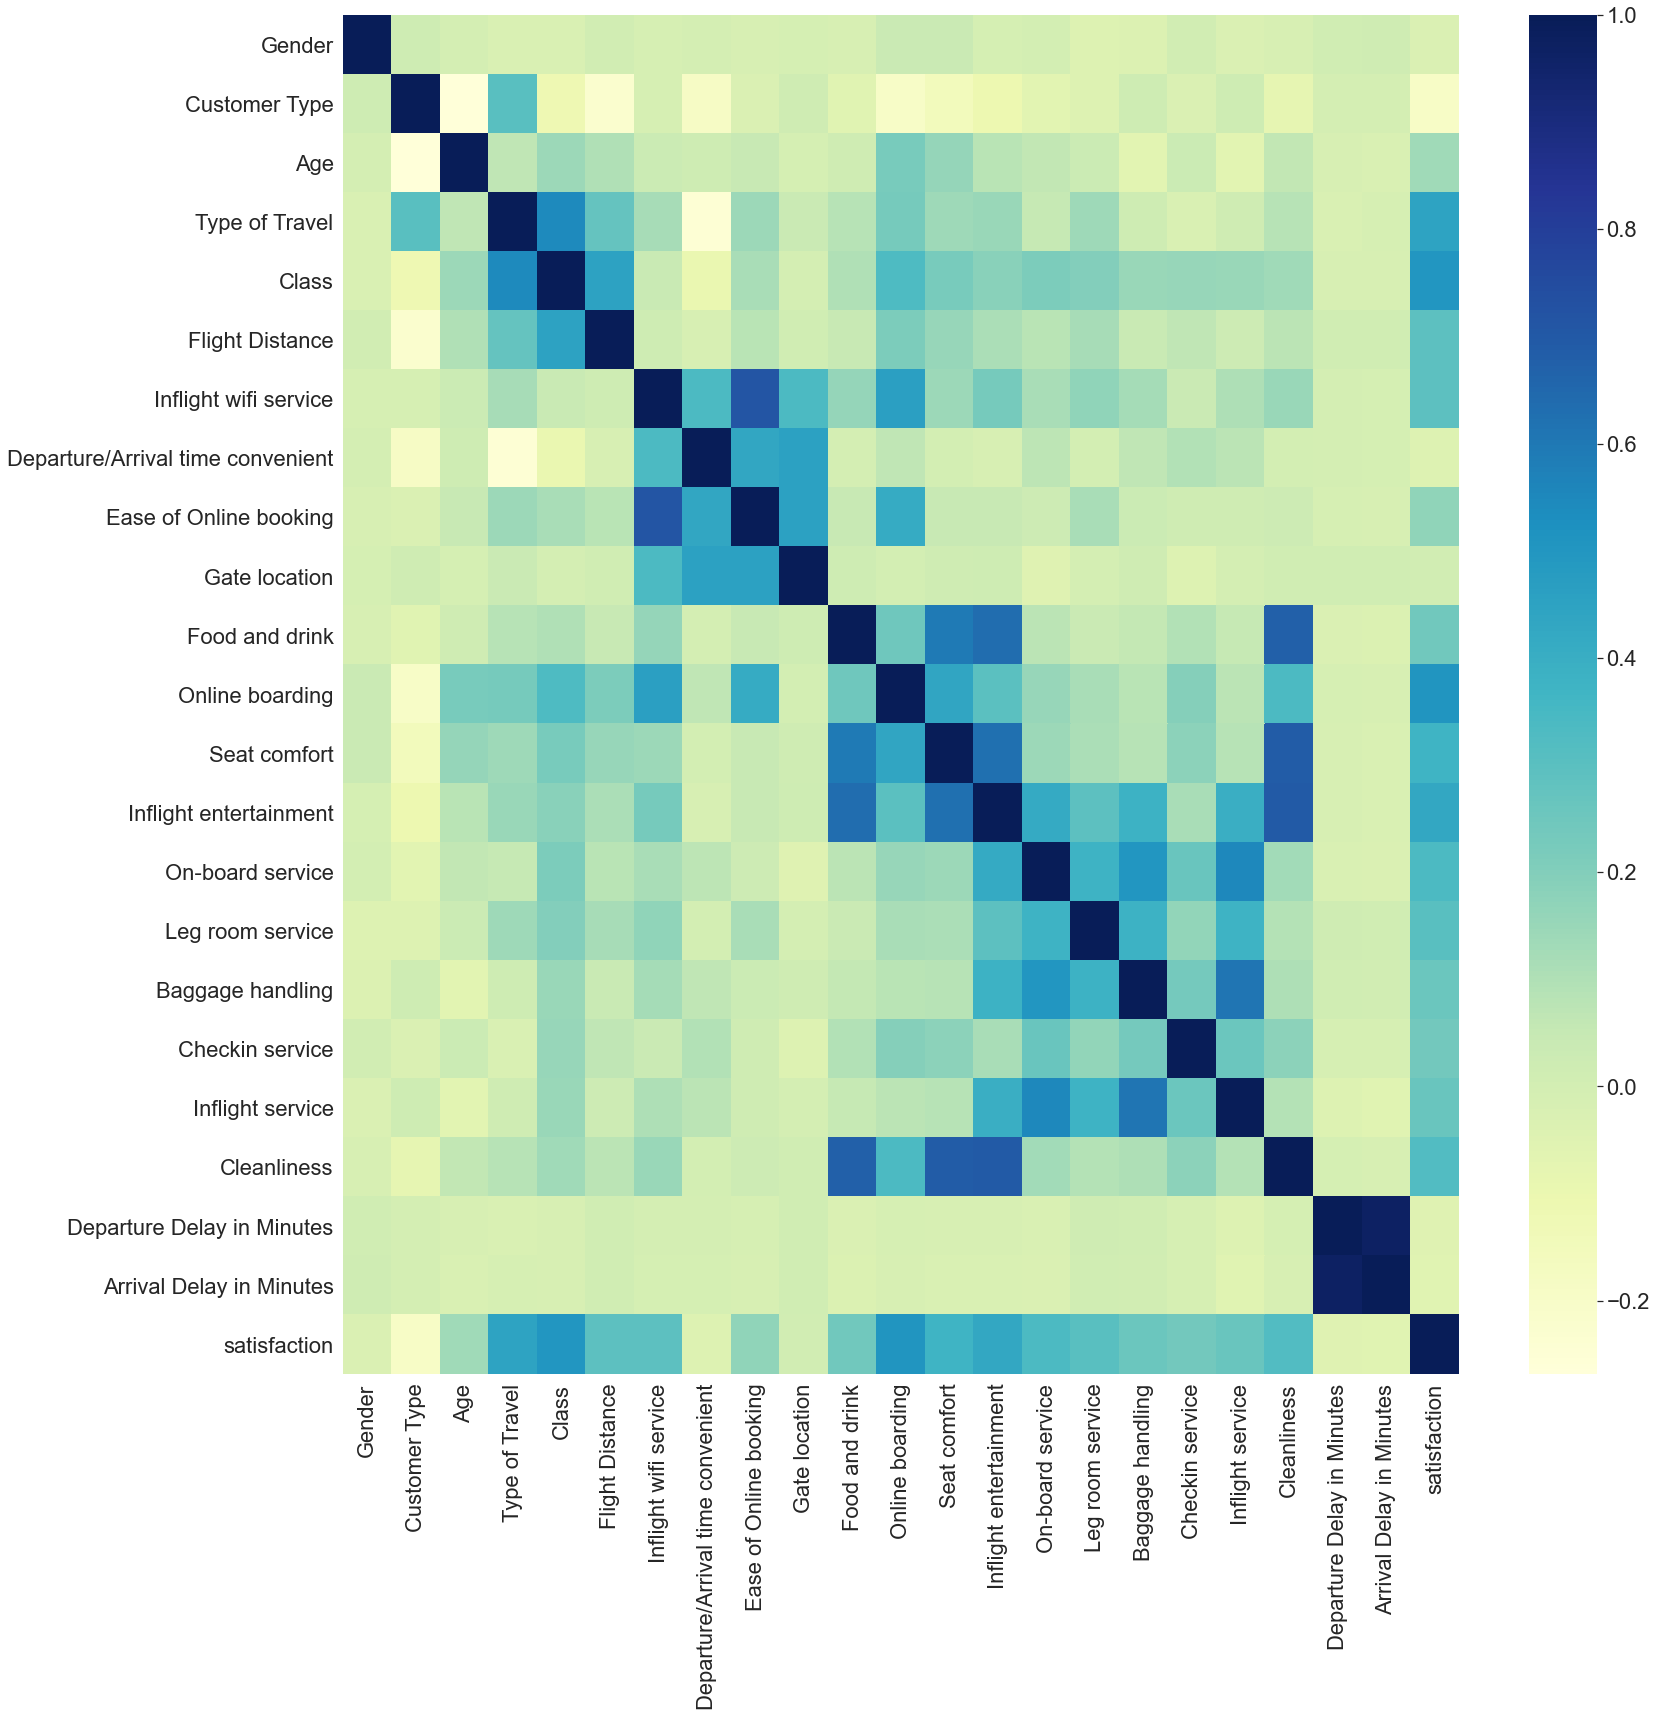

In [20]:
import seaborn as sns
cormap_vars = X
cormap = cormap_vars.corr()
plt.figure(figsize=(25,25))
sns.set(font_scale=2)
sns.heatmap(cormap,cmap="YlGnBu")

In [21]:
cormap

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,0.022318,-0.003464,-0.024635,-0.022334,0.006766,-0.010742,-0.001646,-0.017219,-0.009050,...,-0.006699,-0.000445,-0.041804,-0.036553,0.007254,-0.030261,-0.015770,0.011001,0.017192,-0.028459
Customer Type,0.022318,1.000000,-0.268327,0.305279,-0.116102,-0.220982,-0.013847,-0.188074,-0.029650,0.017795,...,-0.106677,-0.062471,-0.040927,0.020787,-0.029009,0.023039,-0.078777,-0.001922,-0.003940,-0.190930
Age,-0.003464,-0.268327,1.000000,0.063856,0.146811,0.101095,0.030400,0.022942,0.045811,-0.007932,...,0.083381,0.059160,0.031554,-0.062324,0.029668,-0.061895,0.061438,-0.017572,-0.023291,0.134503
Type of Travel,-0.024635,0.305279,0.063856,1.000000,0.545999,0.272449,0.119417,-0.246716,0.145592,0.035639,...,0.151489,0.053519,0.138974,0.023578,-0.024742,0.015706,0.087527,-0.021901,-0.014901,0.448860
Class,-0.022334,-0.116102,0.146811,0.545999,1.000000,0.452585,0.041962,-0.095375,0.114710,-0.003545,...,0.186922,0.213138,0.198662,0.149823,0.156473,0.149016,0.135956,-0.020169,-0.017391,0.499827
Flight Distance,0.006766,-0.220982,0.101095,0.272449,0.452585,1.000000,0.019465,-0.019321,0.079035,0.012732,...,0.110407,0.080330,0.121334,0.043575,0.064170,0.024803,0.076913,0.009245,0.010258,0.293563
Inflight wifi service,-0.010742,-0.013847,0.030400,0.119417,0.041962,0.019465,1.000000,0.336833,0.716465,0.336275,...,0.227832,0.115991,0.169048,0.123595,0.034062,0.103396,0.147860,-0.005579,-0.009027,0.292350
Departure/Arrival time convenient,-0.001646,-0.188074,0.022942,-0.246716,-0.095375,-0.019321,0.336833,1.000000,0.431429,0.457728,...,-0.018560,0.070906,0.003954,0.065938,0.096928,0.077378,0.002303,-0.002600,-0.009413,-0.043662
Ease of Online booking,-0.017219,-0.029650,0.045811,0.145592,0.114710,0.079035,0.716465,0.431429,1.000000,0.456660,...,0.045893,0.024879,0.113781,0.029554,0.016409,0.016895,0.027260,-0.010857,-0.016657,0.170590
Gate location,-0.009050,0.017795,-0.007932,0.035639,-0.003545,0.012732,0.336275,0.457728,0.456660,1.000000,...,0.020123,-0.045704,-0.004758,0.018626,-0.045285,-0.000967,0.010300,0.013276,0.009298,0.006510


In [22]:
X.drop(columns=['Arrival Delay in Minutes'],inplace = True)

In [23]:
# max number of graph generation features
np.log(len(X))

8.699514748210191

In [24]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,69,0,0,964,3,2,3,3,...,2,5,5,3,5,1,5,3,0,0
1,0,0,55,1,2,240,2,5,5,5,...,2,1,1,2,3,2,3,2,163,0
2,1,0,51,1,2,2672,5,5,5,5,...,1,4,4,4,4,5,4,3,0,1
3,0,1,27,1,0,495,2,3,2,2,...,3,3,4,4,3,4,2,3,0,0
4,0,0,12,0,0,462,2,4,2,3,...,2,2,3,4,2,2,1,2,0,0


In [25]:
X.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

Following variables are used for the graph generation:

- Gender
- Customer Type
- Age
- Type of Travel
- Class

In [26]:
X.Age.describe()

count    6000.000000
mean       39.101000
std        15.172931
min         7.000000
25%        27.000000
50%        40.000000
75%        50.000000
max        85.000000
Name: Age, dtype: float64

In [27]:
X.to_csv('clean_data')

In [34]:
genvars = X[['Gender','Customer Type','Age','Type of Travel','Class']].copy(deep=True)

In [35]:
genvars.Age = genvars.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [36]:
genvars

,Gender,Customer Type,Age,Type of Travel,Class
0,1,0,3,0,0
1,0,0,3,1,2
2,1,0,3,1,2
3,0,1,1,1,0
4,0,0,0,0,0
...,...,...,...,...,...
5995,1,0,2,0,0
5996,1,0,1,0,0
5997,0,0,3,0,0
5998,0,0,1,0,0


In [37]:
# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])

# customer type (loyal vs disoyal)

type_alpha0 = 0.8
type_beta1 = 0.5

aff_type = np.array([[type_alpha0, type_beta1],
                     [type_beta1, type_alpha0]])


# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta3,age_beta2,age_beta1,age_alpha0]])


# Type of travel
trav_type_alpha0 = 0.80
trav_type_beta1 = 0.20

aff_trav_type = np.array([[trav_type_alpha0, trav_type_beta1],
                          [trav_type_beta1, trav_type_alpha0]])

# Class

class_alpha0 = 0.85
class_beta1 = 0.60
class_beta2 = 0.40

aff_class = np.array([[class_alpha0, class_beta1, class_beta2],
                      [class_beta1, class_alpha0, class_beta1],
                      [class_beta2, class_beta1, class_alpha0]])


aff = {0:aff_gend,1:aff_type, 2:aff_age, 3:aff_trav_type, 4:aff_class}


In [38]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

KeyboardInterrupt: 

In [ ]:
A = np.triu(P_u_v,1)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0


In [ ]:
A = A + A.T

In [25]:
#np.savetxt('adjacency_matrix_no_gender.csv', A, delimiter=',')

In [2]:
A = np.loadtxt('adjacency_matrix.csv',delimiter=',')

In [3]:
G = nx.from_numpy_matrix(A)

In [32]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=2, walk_length=8, num_walks=100, workers=1)
model = node2vec.fit(window=10, min_count=1, batch_words=2)
#model.wv.save_word2vec_format('embeddings')

Generating walks (CPU: 1): 100%|██████████| 100/100 [18:30:18<00:00, 666.18s/it]     


In [5]:
nx.classes.function.density(G)

0.09328793687836862

In [4]:
cent = nx.algorithms.centrality.eigenvector_centrality(G)

In [5]:
clos_cent = nx.algorithms.centrality.closeness_centrality(G)

In [6]:
be_cent = nx.algorithms.centrality.betweenness_centrality(G)

In [43]:
obj = cent.items()
l = list(obj)
r = np.array(l)
r = r[:,1]

Text(0, 0.5, 'Number of Nodes')

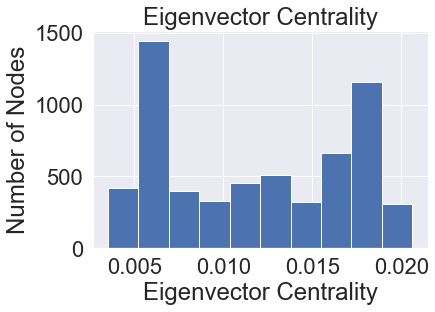

In [44]:
plt.hist(r)
plt.title('Eigenvector Centrality')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Number of Nodes')

In [45]:
obj = clos_cent.items()
l = list(obj)
r = np.array(l)
r = r[:,1]

Text(0, 0.5, 'Number of Nodes')

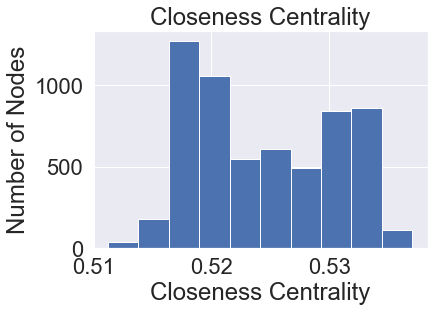

In [46]:
plt.hist(r)
plt.title('Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')

In [12]:
obj = be_cent.items()
l = list(obj)
r = np.array(l)
r = r[:,1]

Text(0, 0.5, 'Number of Nodes')

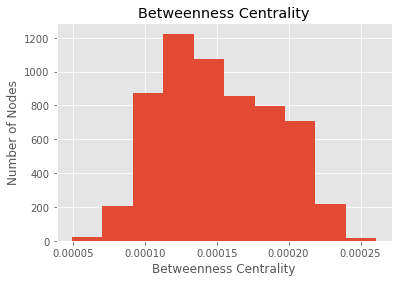

In [13]:
plt.hist(r)
plt.title('Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')

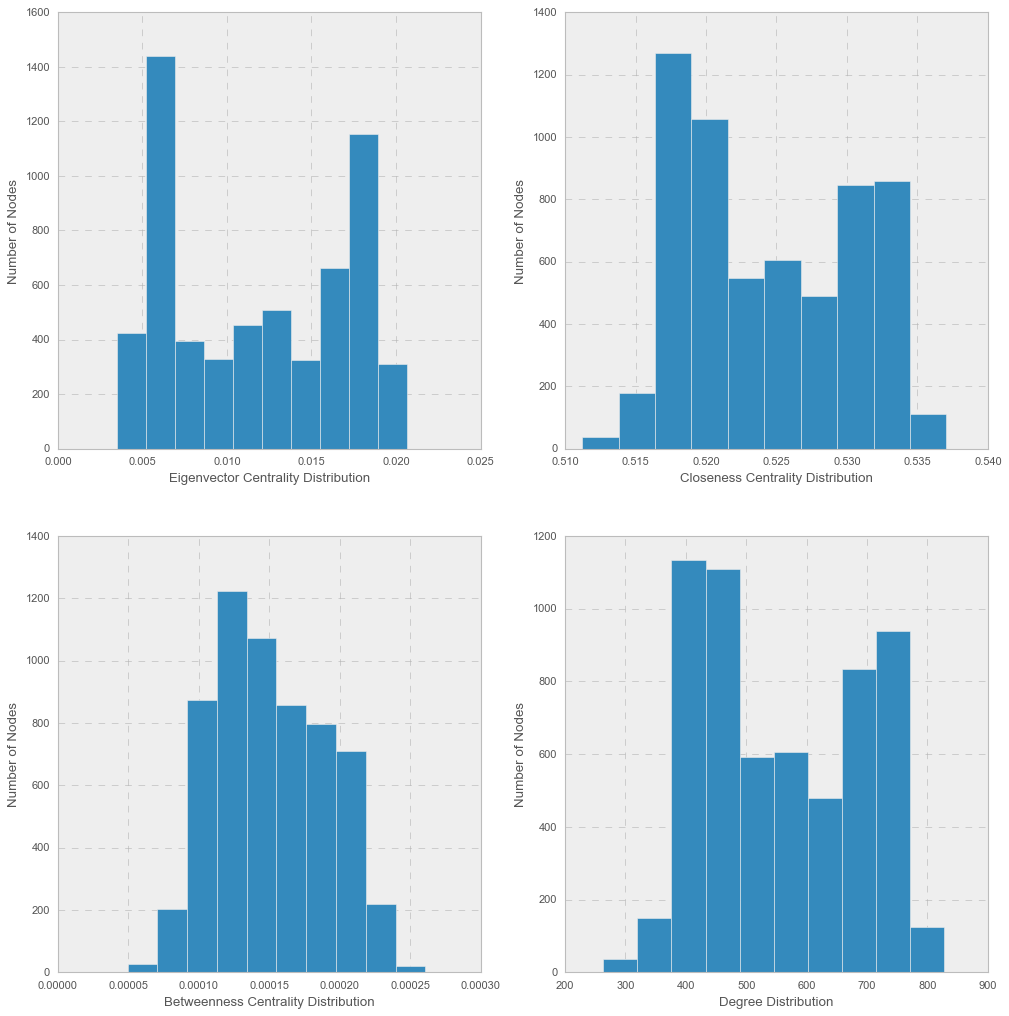

In [31]:
fig = plt.subplots(figsize=(15,15))

plt.subplot(221)
obj = cent.items()
l = list(obj)
r = np.array(l)
r = r[:,1]
plt.hist(r)
#plt.title('Closeness Centrality')
plt.xlabel('Eigenvector Centrality Distribution')
plt.ylabel('Number of Nodes')
#plt.legend()

plt.subplot(222)
obj = clos_cent.items()
l = list(obj)
r = np.array(l)
r = r[:,1]
plt.hist(r)
#plt.title('Closeness Centrality')
plt.xlabel('Closeness Centrality Distribution')
plt.ylabel('Number of Nodes')
#plt.legend()

plt.subplot(223)
obj = be_cent.items()
l = list(obj)
r = np.array(l)
r = r[:,1]
plt.hist(r)
#plt.title('Betweenness Centrality')
plt.xlabel('Betweenness Centrality Distribution')
plt.ylabel('Number of Nodes')
#plt.legend()

plt.subplot(224)
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
#plt.title('Degree Distribution')
plt.xlabel('Degree Distribution')
plt.ylabel('Number of Nodes')
#plt.legend()

#plt.style.context('bmh')
plt.show()

In [49]:
import collections


degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(20,20))
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7feef4822c10> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.hist(G.degree())

In [ ]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.title('Degree Distribution')
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.show()
    
plot_degree_dist(G)

In [ ]:
df_test = pd.read_csv('test.csv',sep=',')
df_test = df_test.sample(n=5000)
df_test.drop(columns=['Unnamed: 0','id'],inplace=True)
df_test.Gender = df_test.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df_test['Customer Type'] = df_test['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df_test['Type of Travel'] = df_test['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df_test['Class'] = df_test['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df_test['satisfaction'] = df_test['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)
df_test.reset_index(drop=True,inplace=True)
df_test.drop(columns=['Arrival Delay in Minutes'],inplace = True)


In [ ]:
X = df_test
X.Age = X.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))
genvars = X[['Gender','Customer Type','Age','Type of Travel','Class']]

In [ ]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [ ]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0

In [ ]:
A = A + A.T - np.diag(np.diag(A))

In [ ]:
G_test = nx.from_numpy_matrix(A)

In [ ]:
features = pd.Series(df_test.satisfaction) # invested or inv_pref

In [ ]:
G_dgl_test = dgl.from_networkx(G_test)
feat = df_test.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl_test.ndata['feat'] =  embedding
#G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.2)
G_dgl_test.ndata['label'] = torch.tensor(features)

In [ ]:
node_features = G_dgl_test.ndata['feat']
node_labels = G_dgl_test.ndata['label']
#train_mask = G_dgl.ndata['train_mask']
#valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [ ]:
def evaluate(model, graph, features, labels):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits
        labels = labels
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [ ]:
model = SAGE(in_feats=n_features, hid_feats=50, out_feats=n_labels)
model.train()
logits = model(G_dgl_test, node_features)
loss = F.cross_entropy(logits, node_labels)
acc = evaluate(model, G_dgl_test, node_features, node_labels)


In [ ]:
acc

In [ ]:
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits, dim=1)
val_lab = val_tens

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
